In [6]:
pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np

# Define the grid size
GRID_SIZE = 20  # 20x20 grid for simplicity

# Define states: 0 = empty, 1 = prey, 2 = predator
EMPTY = 0
PREY = 1
PREDATOR = 2

# Initialize the grid randomly with a certain number of predators and prey
def initialize_grid(grid_size, prey_count, predator_count):
    grid = np.zeros((grid_size, grid_size), dtype=int)

    # Place prey randomly
    for _ in range(prey_count):
        x, y = np.random.randint(0, grid_size, 2)
        grid[x, y] = PREY

    # Place predators randomly
    for _ in range(predator_count):
        x, y = np.random.randint(0, grid_size, 2)
        grid[x, y] = PREDATOR

    return grid

# Initialize the ecosystem with 50 prey and 20 predators
grid = initialize_grid(GRID_SIZE, 50, 20)


In [2]:
def reproduce_prey(grid, reproduction_prob=0.1):
    """Prey reproduction: each prey has a chance to reproduce"""
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            if grid[x, y] == PREY and np.random.random() < reproduction_prob:
                # Randomly attempt to place new prey in adjacent empty space
                new_x, new_y = np.random.randint(max(0, x-1), min(grid.shape[0], x+2)), \
                                np.random.randint(max(0, y-1), min(grid.shape[1], y+2))
                if grid[new_x, new_y] == EMPTY:
                    grid[new_x, new_y] = PREY

def predator_hunt(grid, hunting_prob=0.2):
    """Predator hunting: predators hunt adjacent prey"""
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            if grid[x, y] == PREDATOR:
                # Randomly try to hunt prey in adjacent cells
                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] == PREY:
                        if np.random.random() < hunting_prob:
                            grid[nx, ny] = PREDATOR  # Predator consumes prey

def update_population(grid):
    """Count the number of prey and predators in the grid"""
    prey_count = np.sum(grid == PREY)
    predator_count = np.sum(grid == PREDATOR)
    return prey_count, predator_count


In [8]:
def environmental_event(grid, disease_prob=0.05, drought_prob=0.1):
    """Random environmental events: disease, drought, etc."""
    # Disease event: random prey die due to disease
    if np.random.random() < disease_prob:
        for x in range(grid.shape[0]):
            for y in range(grid.shape[1]):
                if grid[x, y] == PREY and np.random.random() < 0.1:
                    grid[x, y] = EMPTY  # Prey dies from disease

    # Drought event: Randomly remove some prey (food shortage)
    if np.random.random() < drought_prob:
        for x in range(grid.shape[0]):
            for y in range(grid.shape[1]):
                if grid[x, y] == PREY and np.random.random() < 0.2:
                    grid[x, y] = EMPTY  # Prey dies due to drought


In [4]:
import matplotlib.pyplot as plt

def plot_grid(grid):
    """Plot the ecosystem grid as a heatmap"""
    plt.imshow(grid, cmap='Set1', interpolation='nearest')
    plt.colorbar(label="0=Empty, 1=Prey, 2=Predator")
    plt.title("Ecosystem State")
    plt.show()

def plot_population(populations):
    """Plot the predator and prey populations over time"""
    time_steps = range(len(populations['prey']))
    plt.plot(time_steps, populations['prey'], label='Prey')
    plt.plot(time_steps, populations['predator'], label='Predator')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Population Trends Over Time')
    plt.legend()
    plt.show()


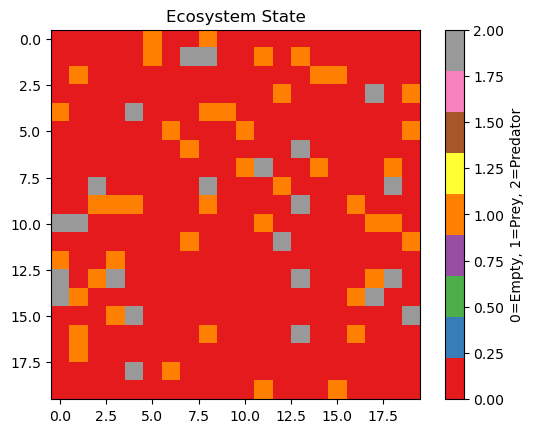

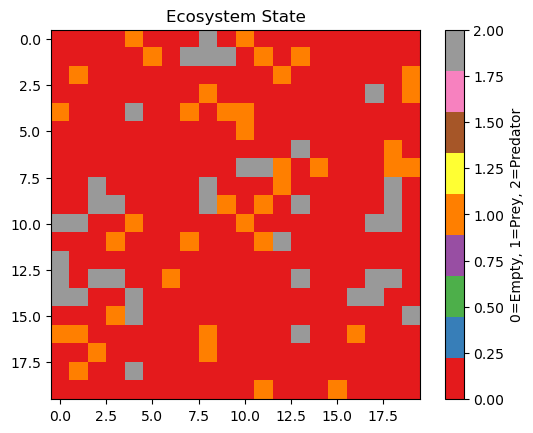

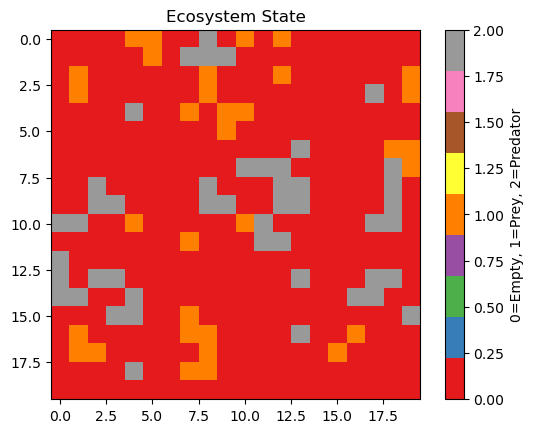

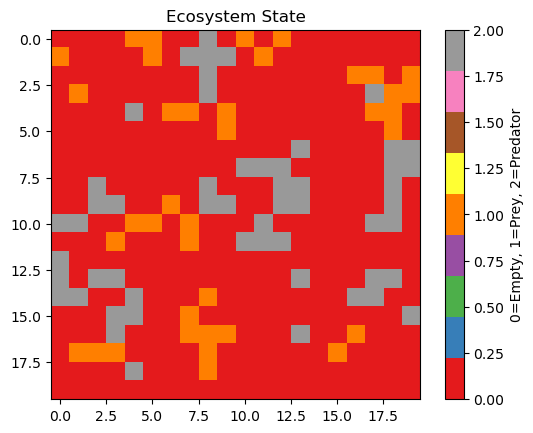

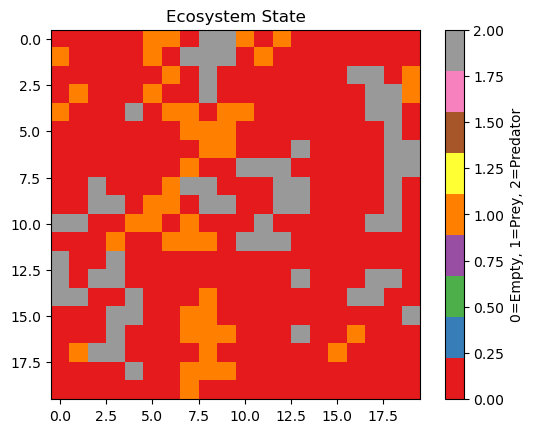

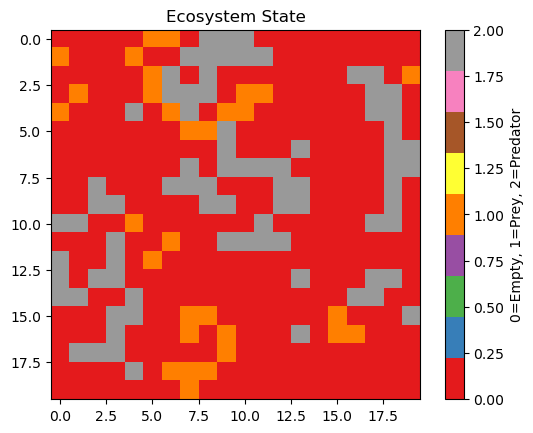

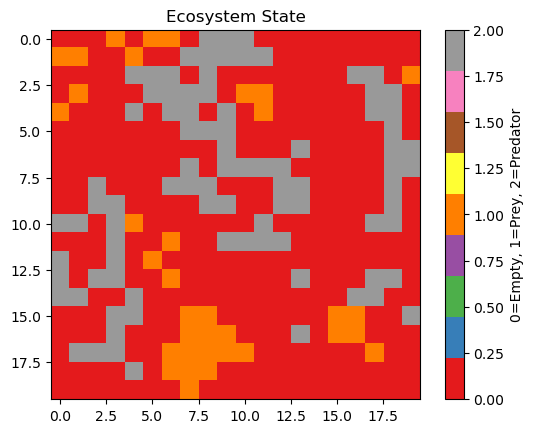

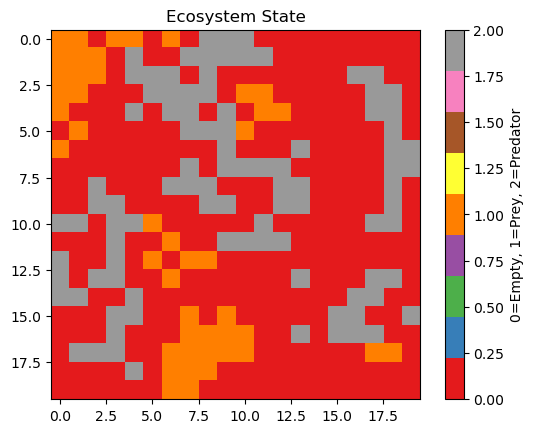

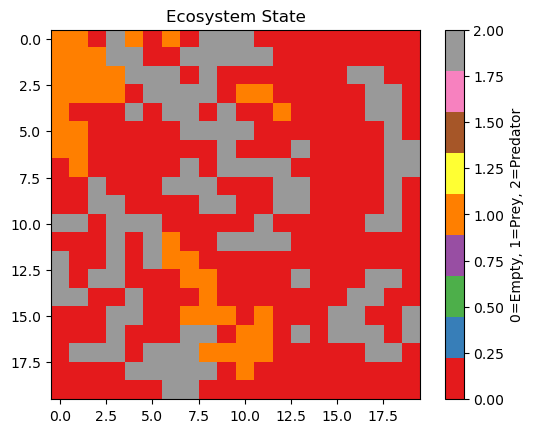

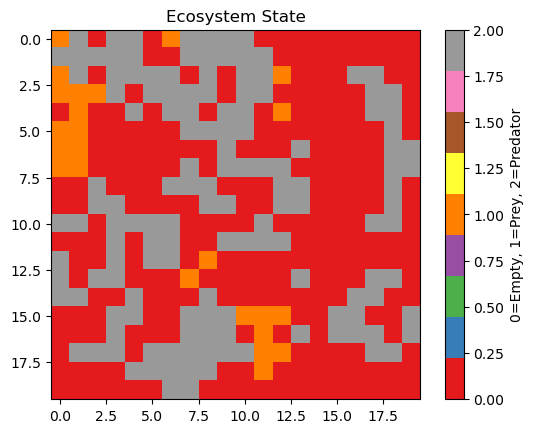

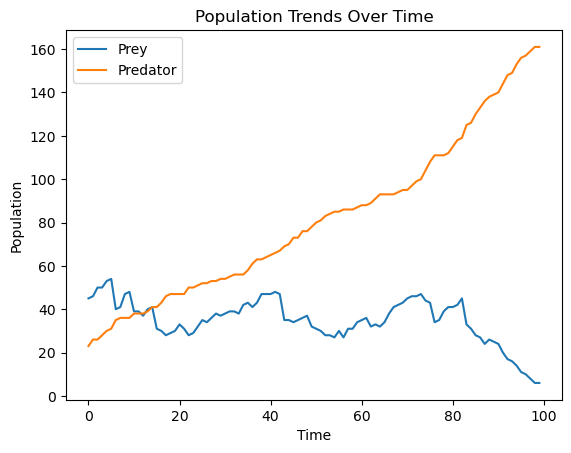

In [9]:
def run_simulation(steps=100):
    grid = initialize_grid(GRID_SIZE, 50, 20)
    populations = {'prey': [], 'predator': []}

    for step in range(steps):
        reproduce_prey(grid)
        predator_hunt(grid)
        environmental_event(grid)

        # Update and track populations
        prey_count, predator_count = update_population(grid)
        populations['prey'].append(prey_count)
        populations['predator'].append(predator_count)

        if step % 10 == 0:  # Show grid every 10 steps
            plot_grid(grid)

    plot_population(populations)

# Run the simulation for 100 steps
run_simulation(100)


In [ ]:
!streamlit run app.py
